<a href="https://colab.research.google.com/github/jhun-kim/mapo_data/blob/main/data_a/Copy_of_%5B%EC%88%98%EC%97%85%5D_OpenAPI_%EA%B3%B5%EA%B3%B5%EB%8D%B0%EC%9D%B4%ED%84%B0%ED%8F%AC%ED%84%B8.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

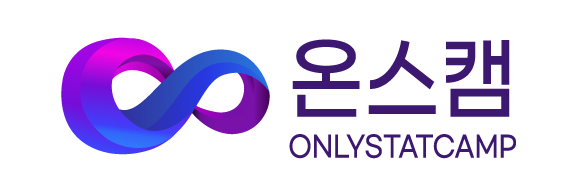

In [ ]:
import numpy as np
import pandas as pd

In [ ]:
pd.set_option('display.max_rows', 100)
pd.set_option('display.max_columns', 100)

In [ ]:
import json
import time
import requests
import xml.etree.ElementTree as ET

In [ ]:
from tqdm import tqdm
from datetime import datetime

---

* https://data.go.kr/iim/api/selectRunAcountRequestForm.do

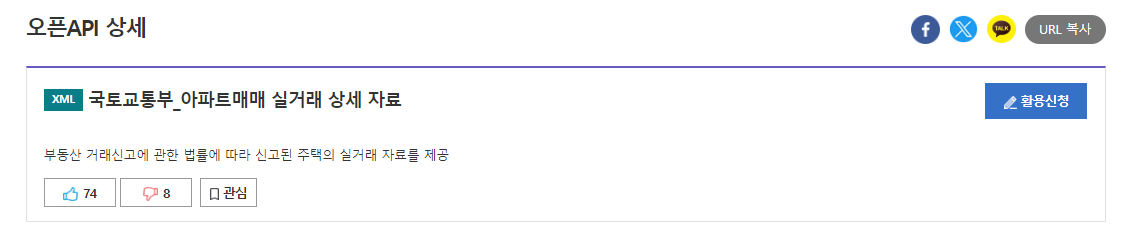

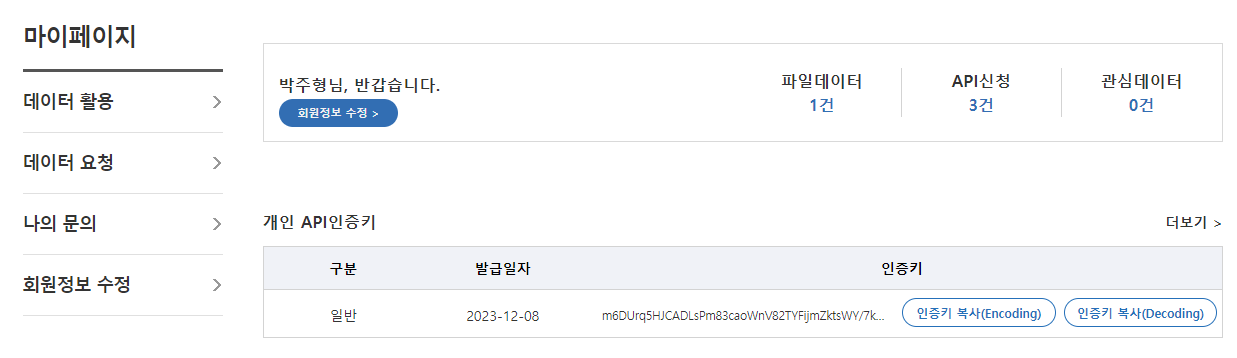

In [ ]:
# serviceKey = "본인의 인증키(Encoding)"

# 예비 개발 서비스키
serviceKey = "hZo4MXy4HVPGCR9EhkHvTwo8b52mx2o8uqPWI99KX7QE%2BBjMhN48vPWNW022Kj4BoAbQ4Knzq5zIJhTfTESYvA%3D%3D"

요청변수(Request Parameter)

|항목명(국문)|항목명(영문)|항목크기|항목구분|샘플데이터|항목설명|
|--- |--- |--- |--- |--- |--- |
|서비스키|ServiceKey|20|필수|-|공공데이터포털에서 받은 인증키|
|페이지 번호|pageNo|4|옵션|1|페이지번호|
|한 페이지 결과 수|numOfRows|4|옵션|10|한 페이지 결과 수|
|지역코드|LAWD_CD|5|필수|11110|지역코드|
|계약월|DEAL_YMD|6|필수|201512|계약월|


출력결과(Response Element)

|항목명(국문)|항목명(영문)|항목크기|항목구분|샘플데이터|항목설명|
|--- |--- |--- |--- |--- |--- |
|결과코드|resultCode|2|필수|00|결과코드|
|결과메시지|resultMsg|50|필수|OK|결과메시지|
|한 페이지 결과 수|numOfRows|4|필수|10|한 페이지 결과 수|
|페이지 번호|pageNo|4|필수|1|페이지번호|
|전체 결과 수|totalCount|4|필수|3|전체 결과 수|
|거래금액|거래금액|40|필수|82,500|거래금액|
|건축년도|건축년도|4|필수|2008|건축년도|
|년|년|4|필수|2015|년|
|도로명|도로명|40|필수|사직로8길|도로명|
|도로명건물본번호코드|도로명건물본번호코드|5|필수|00004|도로명건물본번호코드|
|도로명건물부번호코드|도로명건물부번호코드|5|필수|00000|도로명건물부번호코드|
|도로명시군구코드|도로명시군구코드|5|필수|11110|도로명시군구코드|
|도로명일련번호코드|도로명일련번호코드|2|필수|03|도로명일련번호코드|
|도로명지상지하코드|도로명지상지하코드|1|필수|0|도로명지상지하코드|
|도로명코드|도로명코드|7|필수|4100135|도로명코드|
|법정동|법정동|40|필수|사직동|법정동|
|법정동본번코드|법정동본번코드|4|필수|0009|법정동본번코드|
|법정동부번코드|법정동부번코드|4|필수|0000|법정동부번코드|
|법정동시군구코드|법정동시군구코드|5|필수|11110|법정동시군구코드|
|법정동읍면동코드|법정동읍면동코드|5|필수|11500|법정동읍면동코드|
|법정동지번코드|법정동지번코드|1|필수|1|법정동지번코드|
|아파트|아파트|40|필수|광화문풍림스페이스본(9-0)|아파트|
|월|월|2|필수|12|월|
|일|일|6|필수|1~10|일|
|일련번호|일련번호|14|필수|11110-2203|일련번호|
|전용면적|전용면적|20|필수|94.51|전용면적|
|지번|지번|10|필수|9|지번|
|지역코드|지역코드|5|필수|11110|지역코드|
|층|층|4|필수|11|층|


---

https://www.code.go.kr/stdcode/regCodeL.do

In [ ]:
locCode = ["11110", "11140", "11170", "11200", "11215", "11230", "11260", "11290", "11305", "11320", "11350", "11380", "11410", "11440", "11470", "11500", "11530", "11545", "11560", "11590", "11620", "11650", "11680", "11710", "11740"]
locCode_nm = ["종로구", "중구", "용산구", "성동구", "광진구", "동대문구", "중랑구", "성북구", "강북구", "도봉구", "노원구", "은평구", "서대문구", "마포구", "양천구", "강서구", "구로구", "금천구", "영등포구", "동작구", "관악구", "서초구", "강남구", "송파구", "강동구"]

In [ ]:
for i, j in zip(locCode, locCode_nm):
    print("{} : {}".format(i, j))

11110 : 종로구
11140 : 중구
11170 : 용산구
11200 : 성동구
11215 : 광진구
11230 : 동대문구
11260 : 중랑구
11290 : 성북구
11305 : 강북구
11320 : 도봉구
11350 : 노원구
11380 : 은평구
11410 : 서대문구
11440 : 마포구
11470 : 양천구
11500 : 강서구
11530 : 구로구
11545 : 금천구
11560 : 영등포구
11590 : 동작구
11620 : 관악구
11650 : 서초구
11680 : 강남구
11710 : 송파구
11740 : 강동구


## api test

In [ ]:
# 서비스URL
url = "http://openapi.molit.go.kr/OpenAPI_ToolInstallPackage/service/rest/RTMSOBJSvc/getRTMSDataSvcAptTradeDev?serviceKey={}&LAWD_CD={}&DEAL_YMD={}&pageNo=1&numOfRows=1000"

In [ ]:
# 마포구 & 202312 거래
req = url.format(serviceKey, "11440", "202312")
print(req)

http://openapi.molit.go.kr/OpenAPI_ToolInstallPackage/service/rest/RTMSOBJSvc/getRTMSDataSvcAptTradeDev?serviceKey=hZo4MXy4HVPGCR9EhkHvTwo8b52mx2o8uqPWI99KX7QE%2BBjMhN48vPWNW022Kj4BoAbQ4Knzq5zIJhTfTESYvA%3D%3D&LAWD_CD=11440&DEAL_YMD=202312&pageNo=1&numOfRows=1000


## api 호출

In [ ]:
get = requests.get(req)

## 결과 return

In [ ]:
print(get.content)

## xml문법 파싱

In [ ]:
def get_items(get):
    root = ET.fromstring(get.content)
    item_list = []
    for child in root.find('body').find('items'):
        elements = child.findall('*')
        data = {}
        for element in elements:
            tag = element.tag.strip()
            text = element.text.strip()
            data[tag] = text
        item_list.append(data)
    return item_list

In [ ]:
items_list = get_items(get)

In [ ]:
items_list

## to DataFrame

In [ ]:
items = pd.DataFrame(items_list)

In [ ]:
items

## 2023년12월 서울시 아파트 가격 반복작업

In [ ]:
DataFrame = pd.DataFrame([])

for code, name in zip(locCode, locCode_nm):

    time.sleep(0.5)
    req = url.format(serviceKey, code, 202312)
    get = requests.get(req)
    items_list = get_items(get)
    items = pd.DataFrame(items_list)
    items["시군구"] = name
    DataFrame = pd.concat([DataFrame, items])

DataFrame.to_excel("./아파트매매_실거래_살세_자료_{}_서울시.xlsx".format(202312), index=None)

---